<a href="https://colab.research.google.com/github/kenttw/kent-ai-learning-notebook/blob/master/Machine_Learning_Exercise/CreditCard/downsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s   /gdrive/MyDrive/colab/Credit_Card/data/ /content/data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!pip3 install gdown
import gdown
url = 'https://drive.google.com/uc?id=%s'%("1BtuzztGjF7bU-GGAAokpULytxWnT07cc")
output = 'df_all.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1BtuzztGjF7bU-GGAAokpULytxWnT07cc
To: /content/df_all.csv
3.11GB [00:29, 107MB/s]


'df_all.csv'

In [ ]:
fid = '1-192TDSEBIgaUBVZlAziBxvfJgOrAkx1'
url = 'https://drive.google.com/uc?id=%s'%(fid)
output = 'df_all_y.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-192TDSEBIgaUBVZlAziBxvfJgOrAkx1
To: /content/df_all_y.csv
14.3MB [00:00, 47.4MB/s]


'df_all_y.csv'

In [ ]:
import pandas as pd

In [ ]:
df_X = pd.read_csv("./df_all.csv")

In [ ]:
df_X = df_X.set_index("txkey")

In [ ]:
df_X.head()

,acqic,bacno,cano,conam,loctm,mcc,mchno,scity,contp_0,contp_1,contp_2,contp_3,contp_4,contp_5,contp_6,csmcu_0,csmcu_1,csmcu_2,csmcu_3,csmcu_4,csmcu_5,csmcu_6,csmcu_7,csmcu_8,csmcu_9,csmcu_10,csmcu_11,csmcu_12,csmcu_13,csmcu_14,csmcu_15,csmcu_16,csmcu_17,csmcu_18,csmcu_19,csmcu_20,csmcu_21,csmcu_22,csmcu_23,csmcu_24,...,stocn_74,stocn_75,stocn_76,stocn_77,stocn_78,stocn_79,stocn_80,stocn_81,stocn_82,stocn_83,stocn_84,stocn_85,stocn_86,stocn_87,stocn_88,stocn_89,stocn_90,stocn_91,stocn_92,stocn_93,stocn_94,stocn_95,stocn_96,stocn_97,stocn_98,stocn_99,stocn_100,stocn_101,stocn_102,stocn_103,stocn_104,stocn_105,stocn_106,stocn_107,stocn_108,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4
txkey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
516056,0.582079,0.658734,-1.162081,-0.341794,0.509681,2.028863,0.111604,-2.398364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4376,-3.987783,1.107708,-1.036278,-0.461282,-0.782179,1.952344,-1.812952,0.536031,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
483434,0.582079,-1.409013,1.297514,-0.341794,0.123412,2.028863,0.111604,-2.398364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1407164,0.472498,1.586350,-1.294169,0.903959,0.515305,-0.649316,-0.176983,-0.743258,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1051004,-0.019621,0.504984,-0.453988,0.153869,0.690956,-0.445264,1.228783,0.536031,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_y = pd.read_csv("./df_all_y.csv")

In [ ]:
df_y = df_y.set_index('txkey')

In [ ]:
# 取出 train.csv 的部份
df_X = df_X.loc[df_y.index]


In [ ]:
df_X.head(2)

,acqic,bacno,cano,conam,loctm,mcc,mchno,scity,contp_0,contp_1,contp_2,contp_3,contp_4,contp_5,contp_6,csmcu_0,csmcu_1,csmcu_2,csmcu_3,csmcu_4,csmcu_5,csmcu_6,csmcu_7,csmcu_8,csmcu_9,csmcu_10,csmcu_11,csmcu_12,csmcu_13,csmcu_14,csmcu_15,csmcu_16,csmcu_17,csmcu_18,csmcu_19,csmcu_20,csmcu_21,csmcu_22,csmcu_23,csmcu_24,...,stocn_74,stocn_75,stocn_76,stocn_77,stocn_78,stocn_79,stocn_80,stocn_81,stocn_82,stocn_83,stocn_84,stocn_85,stocn_86,stocn_87,stocn_88,stocn_89,stocn_90,stocn_91,stocn_92,stocn_93,stocn_94,stocn_95,stocn_96,stocn_97,stocn_98,stocn_99,stocn_100,stocn_101,stocn_102,stocn_103,stocn_104,stocn_105,stocn_106,stocn_107,stocn_108,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4
txkey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
516056,0.582079,0.658734,-1.162081,-0.341794,0.509681,2.028863,0.111604,-2.398364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4376,-3.987783,1.107708,-1.036278,-0.461282,-0.782179,1.952344,-1.812952,0.536031,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_X.shape

(1521787, 367)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa078f70f10>]],
      dtype=object)

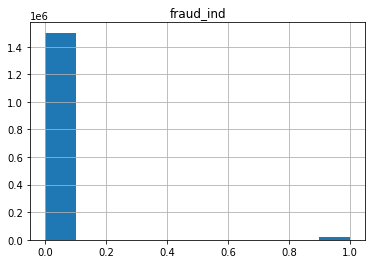

In [ ]:
# very imbalance !
df_y.hist()

In [ ]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test= train_test_split(df_X, df_y, test_size=0.25, random_state=111)

In [ ]:
df_y_index_1 = df_y_train[df_y.fraud_ind==1].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
# down sampling
df_y_index_0 = df_y_train[df_y.fraud_ind==0]
df_y_index_0 = df_y_index_0.sample(len(df_y_index_1), random_state=111).index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
df_y_sample_index = df_y_index_0.to_list() + df_y_index_1.to_list()

In [ ]:
assert len(df_y_sample_index) == len(df_y_index_1)*2

In [ ]:
df_X_sample = df_X_train.loc[df_y_sample_index]

In [ ]:
df_y_sample = df_y_train.loc[df_y_sample_index]

In [ ]:
df_X_sample.to_csv("./data/X_sample.csv")

In [ ]:
df_y_sample.to_csv("./data/y_sample.csv")

In [ ]:
df_X_test.to_csv("./data/X_test.csv",)

In [ ]:
df_y_test.to_csv("./data/y_test.csv",)